In [0]:
import tensorflow as tf

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
import torch
device = torch.device('cuda')

In [4]:
print(torch.cuda.get_device_name())

Tesla P4


In [14]:
!pip install transformers

     |████████████████████████████████| 645kB 7.8MB/s 
     |████████████████████████████████| 1.1MB 22.6MB/s 
     |████████████████████████████████| 890kB 51.1MB/s 
     |████████████████████████████████| 3.8MB 48.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=19f784f70a1ebea39be34438ed736a756917dda53d03429ba447924dacd8da4b
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os

In [0]:
os.chdir('./gdrive/My Drive/Colab Notebooks/')

In [0]:
import pandas as pd 
train = pd.read_csv('./toxic_dataset/train.csv')

In [9]:
train['final'] = 0
for i in range(train.shape[0]):
  if(train.iloc[i,2] == 1 or train.iloc[i,3] == 1 or train.iloc[i,4] == 1 or train.iloc[i,5] == 1 or train.iloc[i,6] == 1 or train.iloc[i,7] == 1):
    print(i)
    train.loc[i,'final'] = 1
  else:
    train.loc[i,'final'] = 0

Streaming output truncated to the last 5000 lines.
110095
110098
110115
110120
110123
110130
110134
110146
110154
110155
110164
110169
110172
110184
110213
110216
110219
110263
110276
110290
110296
110318
110321
110322
110338
110339
110341
110344
110347
110363
110382
110384
110385
110389
110405
110414
110421
110422
110425
110427
110448
110452
110454
110461
110468
110471
110473
110480
110484
110499
110529
110550
110554
110568
110597
110602
110607
110611
110612
110617
110620
110624
110629
110630
110639
110673
110675
110699
110719
110722
110733
110737
110760
110818
110836
110875
110891
110908
110920
110946
110950
110956
110964
110990
110993
110997
111015
111020
111024
111040
111062
111063
111065
111073
111091
111093
111096
111110
111128
111131
111163
111167
111180
111191
111196
111222
111227
111237
111240
111250
111255
111265
111274
111276
111284
111288
111296
111313
111330
111348
111355
111358
111362
111372
111385
111388
111389
111409
111413
111460
111464
111470
111483
111495
111499
1115

In [43]:
train[159540:]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,final
159540,ff9e91b29b89c5fa,I find this block ridiculous and a kick in the...,0,0,0,0,0,0,0
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0,1
159542,ffa95244f261527f,maybe he's got better things to do than spend ...,0,0,0,0,0,0,0
159543,ffad104337fe9891,"scrap that, it does meet criteria and its gone...",0,0,0,0,0,0,0
159544,ffaed63c487a2b42,You could do worse.,0,0,0,0,0,0,0
159545,ffb268f37788a011,", 7 March 2011 (UTC)\nAre you also User:Bmatts...",0,0,0,0,0,0,0
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0,1
159547,ffb7b4c3d3ae5842,"Thank you very, very much. ·✆",0,0,0,0,0,0,0
159548,ffb93b0a0a1e78f9,Talkback: 15 September 2012,0,0,0,0,0,0,0
159549,ffb998f9749bd83e,"2005 (UTC)\n 06:35, 31 Mar",0,0,0,0,0,0,0


In [11]:
train['final'].value_counts()

0    143346
1     16225
Name: final, dtype: int64

In [2]:
train

NameError: ignored

In [0]:
import transformers
from transformers import BertTokenizer

In [16]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [17]:
tokenizer.tokenize(train['comment_text'][0])

['explanation',
 'why',
 'the',
 'edit',
 '##s',
 'made',
 'under',
 'my',
 'user',
 '##name',
 'hardcore',
 'metallic',
 '##a',
 'fan',
 'were',
 'reverted',
 '?',
 'they',
 'weren',
 "'",
 't',
 'van',
 '##dal',
 '##isms',
 ',',
 'just',
 'closure',
 'on',
 'some',
 'gas',
 'after',
 'i',
 'voted',
 'at',
 'new',
 'york',
 'dolls',
 'fa',
 '##c',
 '.',
 'and',
 'please',
 'don',
 "'",
 't',
 'remove',
 'the',
 'template',
 'from',
 'the',
 'talk',
 'page',
 'since',
 'i',
 "'",
 'm',
 'retired',
 'now',
 '.',
 '89',
 '.',
 '205',
 '.',
 '38',
 '.',
 '27']

In [18]:
tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train['comment_text'][0]))

[7526,
 2339,
 1996,
 10086,
 2015,
 2081,
 2104,
 2026,
 5310,
 18442,
 13076,
 12392,
 2050,
 5470,
 2020,
 16407,
 1029,
 2027,
 4694,
 1005,
 1056,
 3158,
 9305,
 22556,
 1010,
 2074,
 8503,
 2006,
 2070,
 3806,
 2044,
 1045,
 5444,
 2012,
 2047,
 2259,
 14421,
 6904,
 2278,
 1012,
 1998,
 3531,
 2123,
 1005,
 1056,
 6366,
 1996,
 23561,
 2013,
 1996,
 2831,
 3931,
 2144,
 1045,
 1005,
 1049,
 3394,
 2085,
 1012,
 6486,
 1012,
 16327,
 1012,
 4229,
 1012,
 2676]

In [21]:
#Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in train['comment_text'][:]:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'

                        # This function also supports truncation and conversion
                        # to pytorch tensors, but we need to do padding, so we
                        # can't use these features :( .
                        #max_length = 128,          # Truncate all sentences.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)

# Print sentence 0, now as a list of IDs.
print('Original: ', train['comment_text'][0])
print('Token IDs:', input_ids[0])

Token indices sequence length is longer than the specified maximum sequence length for this model (629 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (658 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (628 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1227 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (810 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for th

Original:  Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
Token IDs: [101, 7526, 2339, 1996, 10086, 2015, 2081, 2104, 2026, 5310, 18442, 13076, 12392, 2050, 5470, 2020, 16407, 1029, 2027, 4694, 1005, 1056, 3158, 9305, 22556, 1010, 2074, 8503, 2006, 2070, 3806, 2044, 1045, 5444, 2012, 2047, 2259, 14421, 6904, 2278, 1012, 1998, 3531, 2123, 1005, 1056, 6366, 1996, 23561, 2013, 1996, 2831, 3931, 2144, 1045, 1005, 1049, 3394, 2085, 1012, 6486, 1012, 16327, 1012, 4229, 1012, 2676, 102]


In [28]:
length = []

for i in range(len(input_ids)):
  length.append(len(input_ids[i]))
  if(i%1000 == 0):
    print(i)


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [29]:
length[:100]

[68,
 35,
 54,
 144,
 21,
 17,
 12,
 31,
 119,
 17,
 631,
 17,
 90,
 181,
 53,
 167,
 20,
 18,
 32,
 102,
 64,
 23,
 141,
 25,
 287,
 45,
 67,
 81,
 36,
 24,
 28,
 18,
 16,
 239,
 87,
 184,
 301,
 87,
 38,
 261,
 50,
 59,
 173,
 12,
 83,
 181,
 27,
 27,
 167,
 262,
 660,
 40,
 41,
 128,
 15,
 24,
 22,
 167,
 446,
 93,
 27,
 66,
 10,
 229,
 48,
 80,
 38,
 35,
 50,
 58,
 50,
 71,
 15,
 310,
 54,
 21,
 57,
 62,
 46,
 21,
 252,
 630,
 113,
 61,
 30,
 28,
 20,
 20,
 77,
 7,
 197,
 120,
 26,
 22,
 104,
 133,
 16,
 33,
 50,
 71]

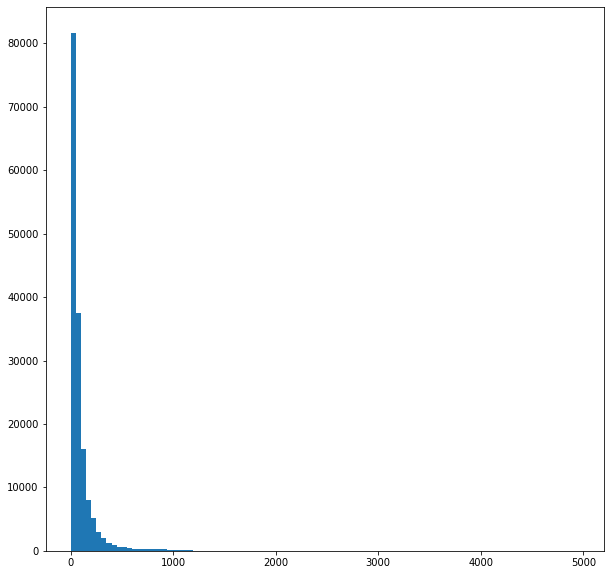

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plt.hist(length, bins=100)
plt.show()

In [45]:
sorted_length = sorted(length)
sorted_length[156100] #120,000 -> 105 #130,000 -> 133 #140,000 -> 179 #150,000 -> 279 $155,000 -> 433 #156,000 -> 510 #156,100 -> 516 
# ~2.2% is above 512 tokens and ~18% is above 128 tokens

516

In [48]:
# We'll borrow the `pad_sequences` utility function to do this.
from keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length.
# I've chosen 64 somewhat arbitrarily. It's slightly larger than the
# maximum training sentence length of 47...
MAX_LEN = 128

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')

Using TensorFlow backend.



Padding/truncating all sentences to 128 values...

Padding token: "[PAD]", ID: 0

Done.


In [49]:
input_ids[0]

array([  101,  7526,  2339,  1996, 10086,  2015,  2081,  2104,  2026,
        5310, 18442, 13076, 12392,  2050,  5470,  2020, 16407,  1029,
        2027,  4694,  1005,  1056,  3158,  9305, 22556,  1010,  2074,
        8503,  2006,  2070,  3806,  2044,  1045,  5444,  2012,  2047,
        2259, 14421,  6904,  2278,  1012,  1998,  3531,  2123,  1005,
        1056,  6366,  1996, 23561,  2013,  1996,  2831,  3931,  2144,
        1045,  1005,  1049,  3394,  2085,  1012,  6486,  1012, 16327,
        1012,  4229,  1012,  2676,   102,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0]

In [0]:
# Create attention masks
attention_masks = []

# For each sentence...
for sent in input_ids:
    
    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]
    
    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

In [61]:
import numpy as np
labels = np.array(train['final'])
labels[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [0]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=2018, test_size=0.1)

In [0]:
# Convert all inputs and labels into torch tensors, the required datatype 
# for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [59]:
train_inputs[0]

array([  101,  1045,  1005,  2222,  5587,  2178,  2376,  1997,  3820,
        2007, 25841,  1012,  1996, 10971,  1997,  1037,  2391,  2003,
        2521,  1998,  2185,  1996,  2062,  2691,  8192,  1999,  2026,
        3325,  1010,  1998,  2009,  2003,  3733,  2438,  2000,  2236,
        5562,  2023,  2039,  2000, 27535,  1997,  4520,  2004,  2734,
        1012,  2445,  1996,  3267,  1997, 16948,  2009,  3849, 21082,
        2000,  2707,  2007,  1996,  2062,  2691,  8192,  2034,  1012,
         102,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0]

In [0]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 32

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [65]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [0]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [0]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [0]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [69]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...


/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha)


  Batch    40  of  4,488.    Elapsed: 0:00:30.
  Batch    80  of  4,488.    Elapsed: 0:01:00.
  Batch   120  of  4,488.    Elapsed: 0:01:31.
  Batch   160  of  4,488.    Elapsed: 0:02:01.
  Batch   200  of  4,488.    Elapsed: 0:02:31.
  Batch   240  of  4,488.    Elapsed: 0:03:01.
  Batch   280  of  4,488.    Elapsed: 0:03:31.
  Batch   320  of  4,488.    Elapsed: 0:04:01.
  Batch   360  of  4,488.    Elapsed: 0:04:31.
  Batch   400  of  4,488.    Elapsed: 0:05:02.
  Batch   440  of  4,488.    Elapsed: 0:05:32.
  Batch   480  of  4,488.    Elapsed: 0:06:02.
  Batch   520  of  4,488.    Elapsed: 0:06:32.
  Batch   560  of  4,488.    Elapsed: 0:07:02.
  Batch   600  of  4,488.    Elapsed: 0:07:32.
  Batch   640  of  4,488.    Elapsed: 0:08:02.
  Batch   680  of  4,488.    Elapsed: 0:08:33.
  Batch   720  of  4,488.    Elapsed: 0:09:03.
  Batch   760  of  4,488.    Elapsed: 0:09:33.
  Batch   800  of  4,488.    Elapsed: 0:10:03.
  Batch   840  of  4,488.    Elapsed: 0:10:33.
  Batch   880

In [70]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './model_save/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))


Saving model to ./model_save/


('./model_save/vocab.txt',
 './model_save/special_tokens_map.json',
 './model_save/added_tokens.json')

In [71]:
!ls -l --block-size=K ./model_save/

total 427947K
-rw------- 1 root root      1K May 17 03:48 config.json
-rw------- 1 root root 427719K May 17 03:48 pytorch_model.bin
-rw------- 1 root root      1K May 17 03:48 special_tokens_map.json
-rw------- 1 root root      1K May 17 03:48 tokenizer_config.json
-rw------- 1 root root    227K May 17 03:48 vocab.txt
